<a href="https://colab.research.google.com/github/KhotNoorin/Algorithm-practice/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: Noorin Nasir Khot

ID Number: 2024KPAD1007


Working:

1. **Load and Preprocess Data**  
   - MNIST dataset (handwritten digits) is loaded.  
   - Data is normalized (scaled between 0 and 1) and reshaped to fit the CNN input format.  
   - Labels are one-hot encoded for multi-class classification.

2. **Build CNN Model**  
   - A sequential model is created with:  
     - 3 convolutional layers.  
     - Max pooling layers .  
     - Fully connected layers.  
     - Dropout layer.  
     - Output layer with softmax activation.  

3. **Compile and Train Model**  
   - Compiled using Adam optimizer and categorical cross-entropy loss function.  
   - Model is trained on training data, and performance is evaluated on test data.  

4. **Performance Evaluation and Visualization**  
   - Accuracy and loss curves are plotted to analyze training progress.  
   - Confusion matrix visualizes model predictions.  
   - Sample predictions are displayed for verification.  
   - A random test image is predicted and shown with its label.  


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from sklearn.metrics import confusion_matrix

In [ ]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
print(f"Training Samples: {x_train.shape[0]}, Testing Samples: {x_test.shape[0]}")

Training Samples: 60000, Testing Samples: 10000


In [ ]:
# Normalize data to [0,1] range
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Reshape data to fit CNN input shape (28,28,1)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [ ]:
# One-hot encode labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [ ]:
# Model building
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128, (3,3), activation='relu'),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1152)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 241,546 (943.54 KB)

 Trainable params: 241,546 (943.54 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 61s 63ms/step - accuracy: 0.8418 - loss: 0.4914 - val_accuracy: 0.9878 - val_loss: 0.0402
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 92s 73ms/step - accuracy: 0.9786 - loss: 0.0742 - val_accuracy: 0.9892 - val_loss: 0.0309
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 55ms/step - accuracy: 0.9845 - loss: 0.0514 - val_accuracy: 0.9910 - val_loss: 0.0258
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 58ms/step - accuracy: 0.9890 - loss: 0.0371 - val_accuracy: 0.9919 - val_loss: 0.0255
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 96s 73ms/step - accuracy: 0.9911 - loss: 0.0304 - val_accuracy: 0.9833 - val_loss: 0.0532
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 58s 62ms/step - accuracy: 0.9916 - loss: 0.0276 - val_accuracy: 0.9929 - val_loss: 0.0248
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9936 - loss: 0.0213 - val_accuracy: 0.9919 - val_loss: 0.0284
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 84s 63ms/step - accuracy: 0.9942 - loss: 0.0186 - 

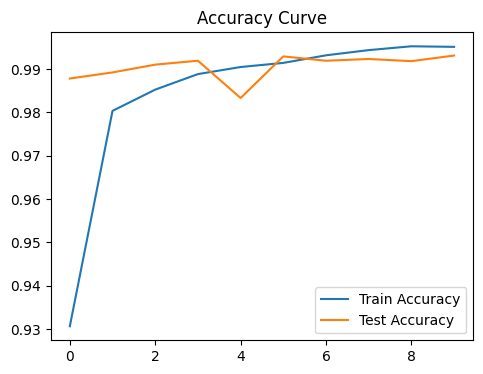

In [ ]:
# Plot training history
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.legend()
plt.title('Accuracy Curve')
plt.show()

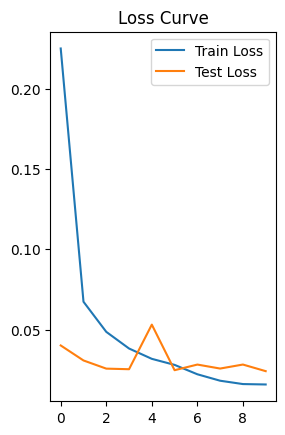

In [ ]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend()
plt.title('Loss Curve')
plt.show()

In [ ]:
# Evaluate model
loss, acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9910 - loss: 0.0308
Test Accuracy: 99.31%


313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


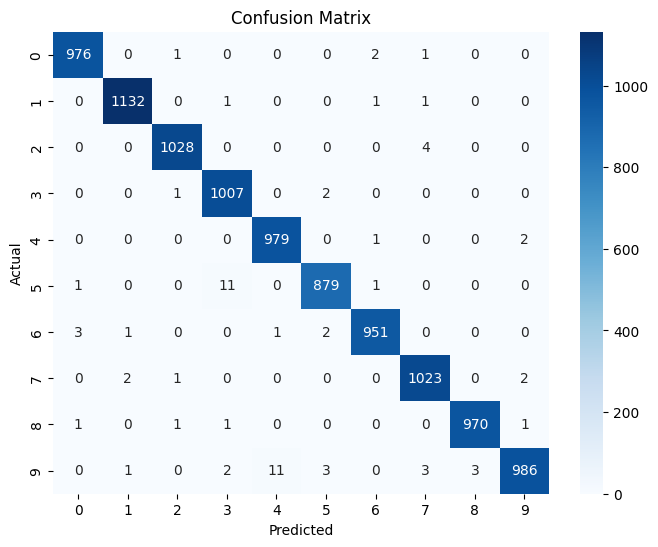

In [ ]:
# Confusion matrix
y_pred = np.argmax(model.predict(x_test), axis=1)
y_true = np.argmax(y_test, axis=1)
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

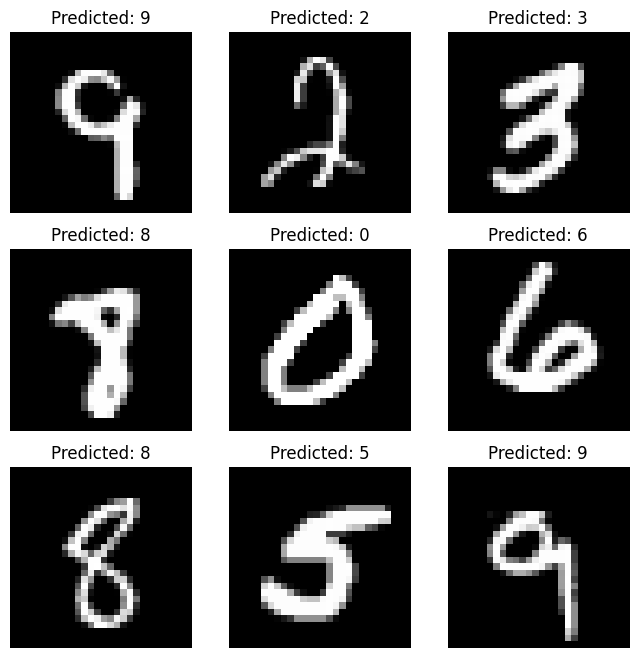

In [ ]:
# Display some predictions
fig, axes = plt.subplots(3, 3, figsize=(8,8))
indices = np.random.choice(range(len(x_test)), 9, replace=False)
for i, ax in enumerate(axes.flat):
    ax.imshow(x_test[indices[i]].reshape(28,28), cmap='gray')
    ax.set_title(f"Predicted: {y_pred[indices[i]]}")
    ax.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


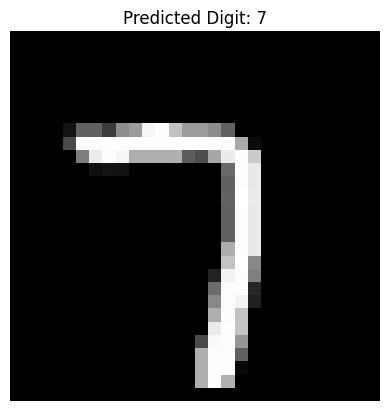

In [ ]:
# Predict a single digit and visualize it
sample_idx = np.random.randint(0, len(x_test))
sample_image = x_test[sample_idx].reshape(1, 28, 28, 1)
prediction = np.argmax(model.predict(sample_image))
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Predicted Digit: {prediction}")
plt.axis('off')
plt.show()